# Logistic Regression

## Homework #3 by Glaktionova Natalia

Breast Cancer Wisconsin (Diagnostic) Data Set

## Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

In [2]:
import warnings
warnings.filterwarnings("ignore")

Считываем и просматриваем данные

In [3]:
df = pd.read_csv('data/breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
print('Количество признаков: %s' %df.shape[1])
print('Количество наблюдений: %s' %df.shape[0]) 

Количество признаков: 33
Количество наблюдений: 569


Проверяем есть ли пустые значения

In [6]:
df.isnull().sum() 

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

 Удалим ненужные столбцы id и "Unnamed: 32" 

In [7]:
df.drop(columns=['id','Unnamed: 32'], inplace=True)

Посмотрим на базовые статистики датасета

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Посмотрим на целевую переменную

In [10]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

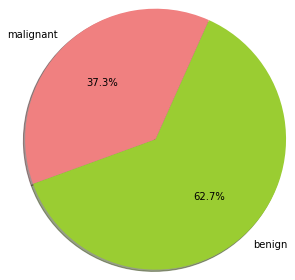

In [11]:
colors = ['yellowgreen', 'lightcoral']
labels = ['benign', 'malignant',]
plt.pie(df.diagnosis.value_counts(), radius = 1.5, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True,startangle=200);

## Визуальный анализ

Строим гистограммы по всем столбцам

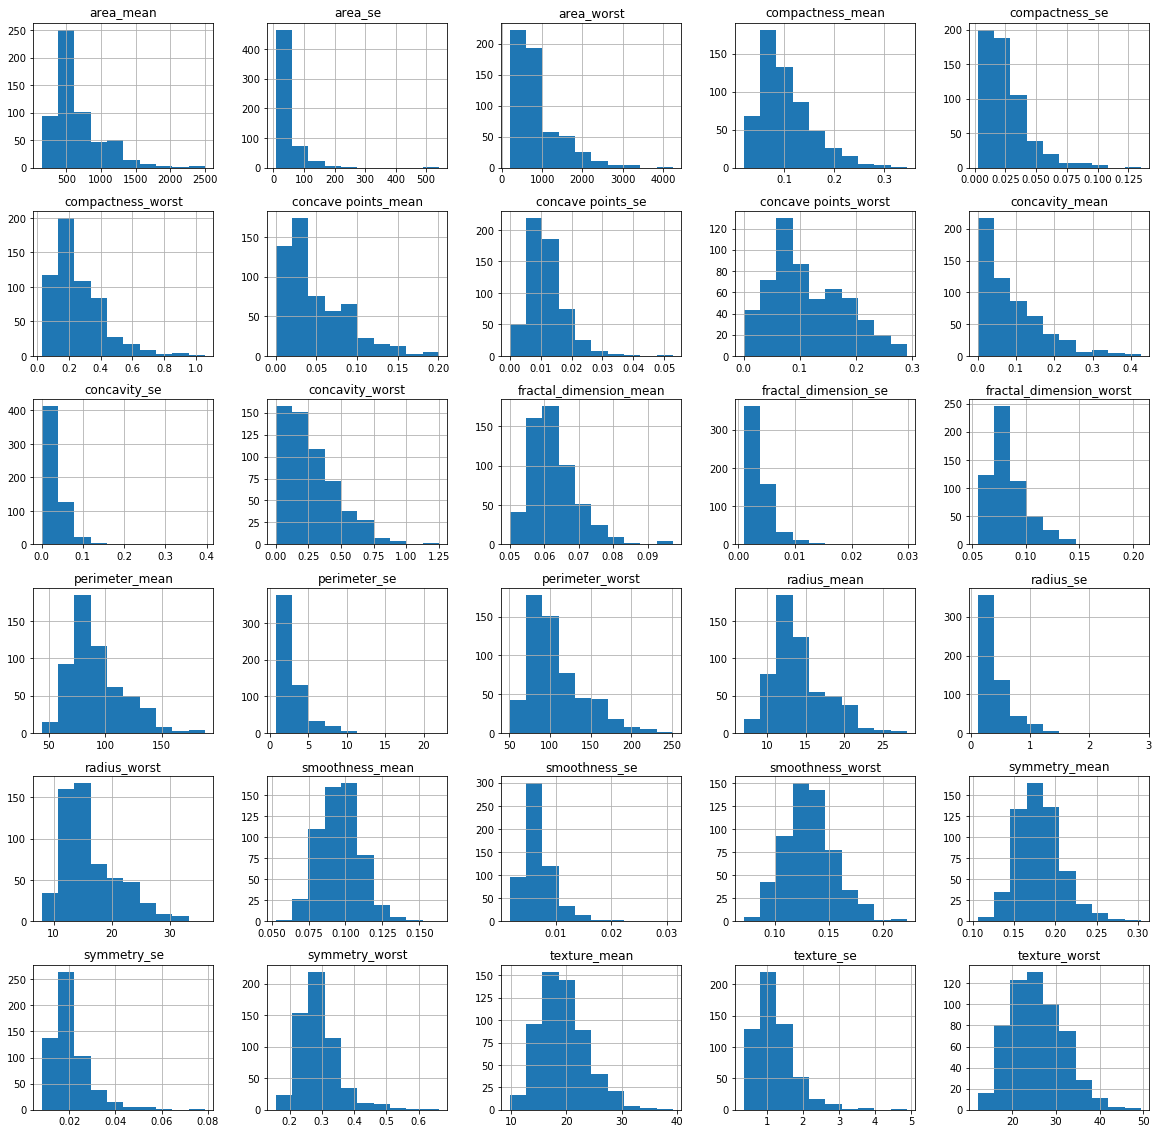

In [12]:
df.hist(figsize=(20, 20));

Строим гистограммы по всем признакам в разбивке по диагнозу.

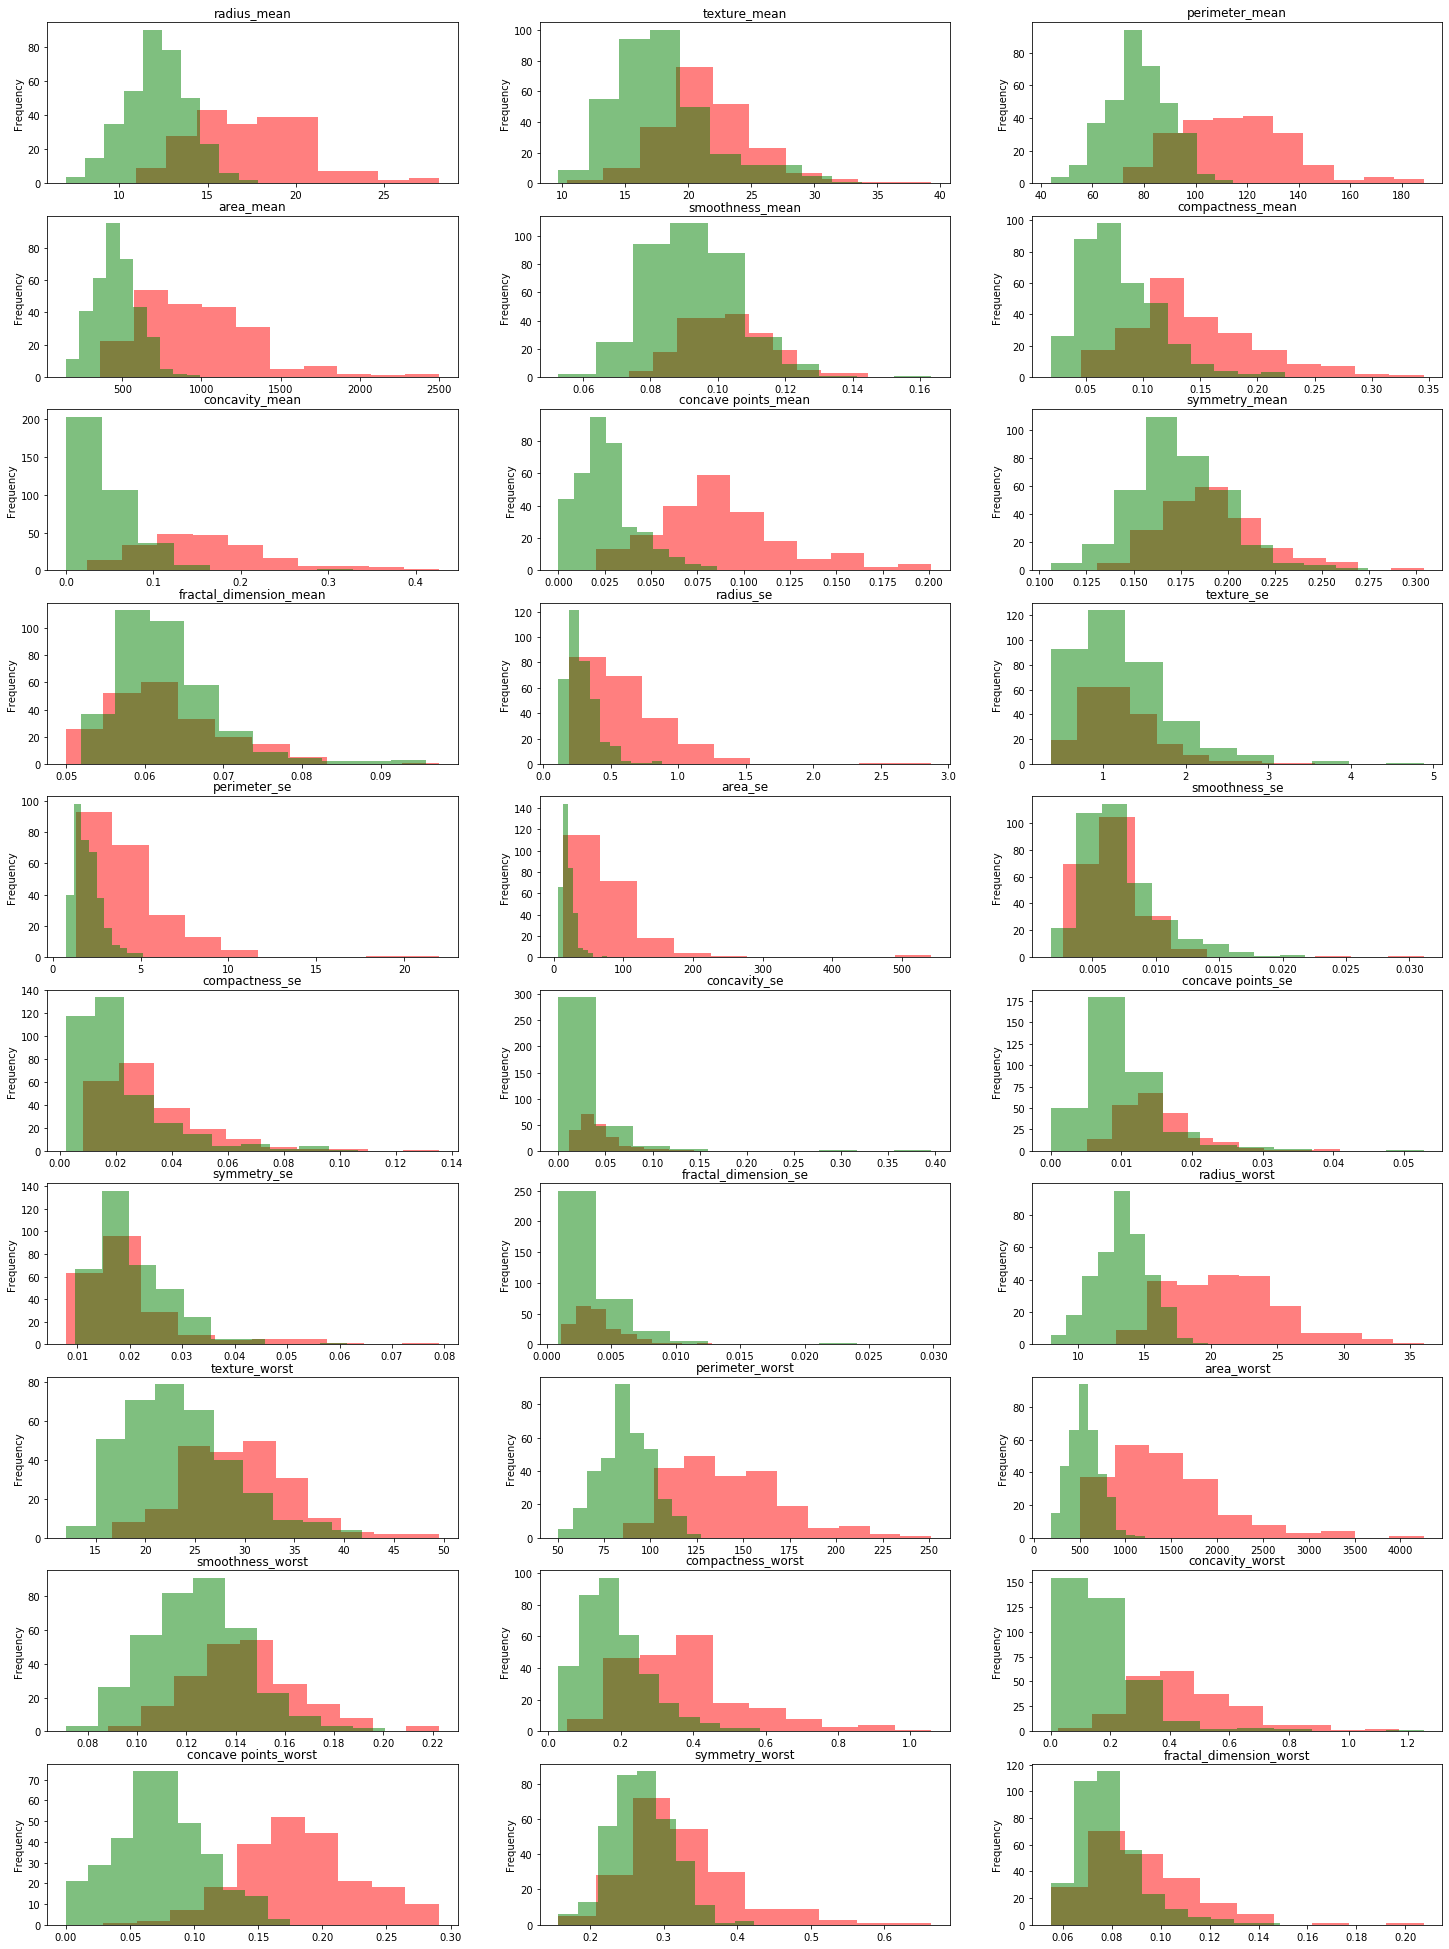

In [13]:
rowCnt = 10
colCnt = 3  

fig = plt.figure(figsize=(25,35))

for i, column in enumerate(df.columns[1:]):
    fig.add_subplot(rowCnt, colCnt, i+1)
    df[column][df['diagnosis'] == 'M'].plot.hist(alpha = 0.5, color = 'red', title = column)
    df[column][df['diagnosis'] == 'B'].plot.hist(alpha = 0.5, color = 'green')   

plt.show()    


Строим тепловую карту по всем признакам

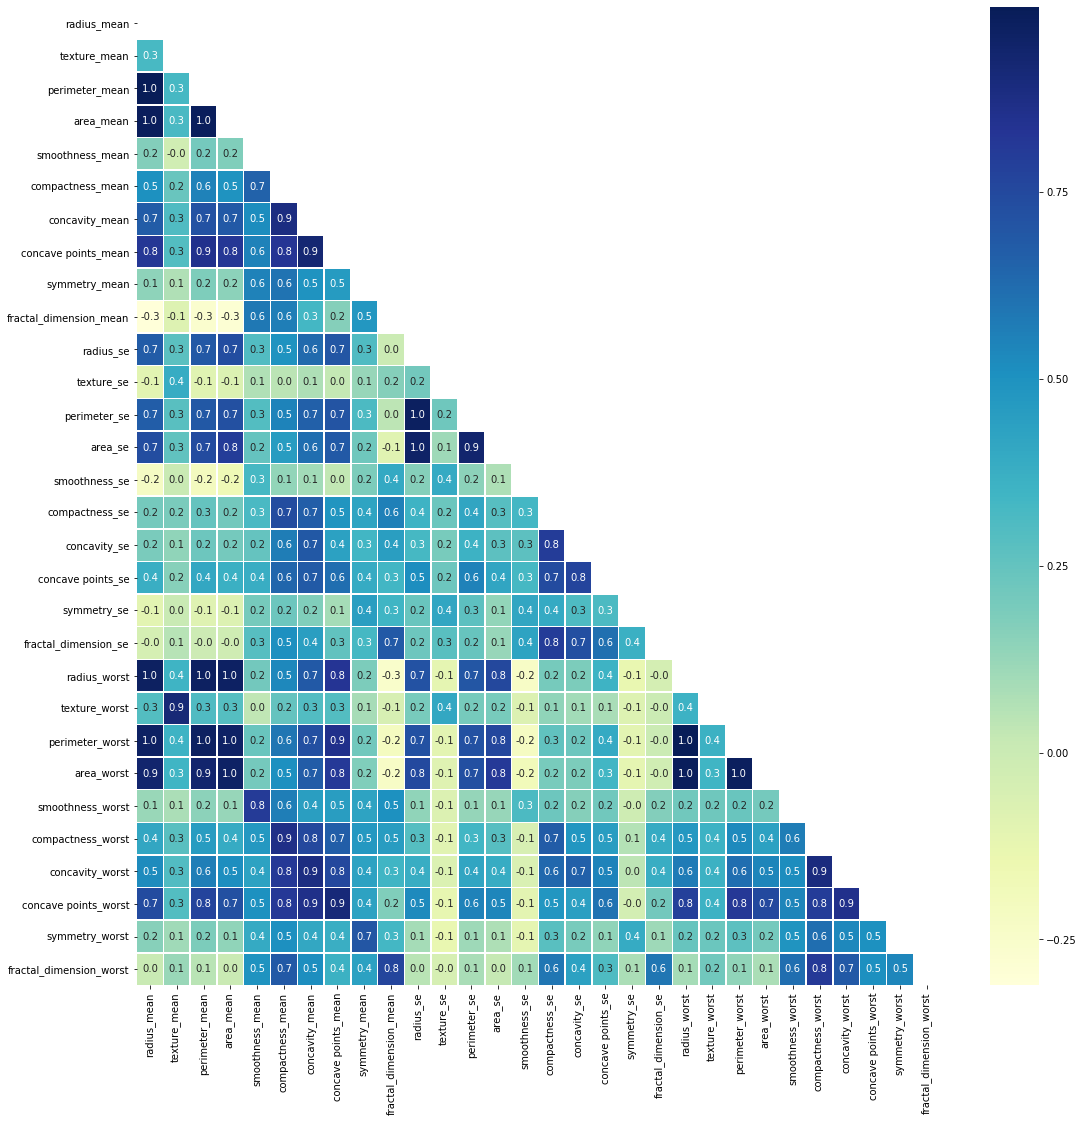

In [14]:
Corr = df.corr()
plt.figure(figsize=(18,18));
lower_corr = Corr.where(np.tril(np.ones(Corr.shape), k=-1).astype(np.bool))
sns.heatmap(lower_corr, annot=True, linewidths=.5, fmt='.1f', cmap="YlGnBu");

Рассмотрим все признаки с корреляцией 0,85 и выше

In [15]:
corr_stack = (Corr.where(np.triu(np.ones(Corr.shape), k = 1)
                        .astype(np.bool))
                        .stack()
                        .sort_values(ascending=False))

In [16]:
corr_stack[abs(corr_stack) > 0.85]

radius_mean          perimeter_mean          0.997855
radius_worst         perimeter_worst         0.993708
radius_mean          area_mean               0.987357
perimeter_mean       area_mean               0.986507
radius_worst         area_worst              0.984015
perimeter_worst      area_worst              0.977578
radius_se            perimeter_se            0.972794
perimeter_mean       perimeter_worst         0.970387
radius_mean          radius_worst            0.969539
perimeter_mean       radius_worst            0.969476
radius_mean          perimeter_worst         0.965137
area_mean            radius_worst            0.962746
                     area_worst              0.959213
                     perimeter_worst         0.959120
radius_se            area_se                 0.951830
perimeter_mean       area_worst              0.941550
radius_mean          area_worst              0.941082
perimeter_se         area_se                 0.937655
concavity_mean       concave

In [17]:
selected_columns = corr_stack[abs(corr_stack) > 0.85].index.tolist()
selected_columns = np.unique(np.asarray(selected_columns).ravel())
selected_columns

array(['area_mean', 'area_se', 'area_worst', 'compactness_mean',
       'compactness_worst', 'concave points_mean', 'concave points_worst',
       'concavity_mean', 'concavity_worst', 'perimeter_mean',
       'perimeter_se', 'perimeter_worst', 'radius_mean', 'radius_se',
       'radius_worst', 'texture_mean', 'texture_worst'], dtype='<U20')

Убираем столбцы с сильной корреляцией

In [18]:
df.drop(columns=selected_columns, inplace=True)

Перекодируем целевую переменную

In [19]:
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x=='M' else 0)

In [20]:
df.head()

,diagnosis,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,1,0.11840,0.2419,0.07871,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.4601,0.11890
1,1,0.08474,0.1812,0.05667,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.2750,0.08902
2,1,0.10960,0.2069,0.05999,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.3613,0.08758
3,1,0.14250,0.2597,0.09744,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.6638,0.17300
4,1,0.10030,0.1809,0.05883,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2364,0.07678


## Логистическая регрессия

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [22]:
def print_quality_report(prediction, actual):
    Accuracy = accuracy_score(prediction, actual)
    Precision = precision_score(prediction, actual)
    Recall = recall_score(prediction, actual)
    F1 = f1_score(prediction, actual)
        
    quality_list = [Accuracy, Precision, Recall, F1]
    
    return quality_list

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['diagnosis'], axis=1), 
    df['diagnosis'], 
    test_size=0.30, 
    random_state=42,
    stratify=df['diagnosis']
)

In [28]:
X_train.shape, X_test.shape

((398, 13), (171, 13))

Нормализуем данные

In [29]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Строим логистическую регрессию**

In [30]:
log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
quality_list_lr = print_quality_report(log_reg.predict(X_train_scaled), y_train)

df_quality = pd.DataFrame(
    [quality_list_lr],
    columns=["Accuracy", "Precision", "Recall"," F1 score"],
    index=["Logistic Regression Train"])

df_quality.loc["Logistic Regression Test", :] = print_quality_report(log_reg.predict(X_test_scaled), y_test)

df_quality.round(3)

,Accuracy,Precision,Recall,F1 score
Logistic Regression Train,0.907,0.872,0.878,0.875
Logistic Regression Test,0.930,0.891,0.919,0.905


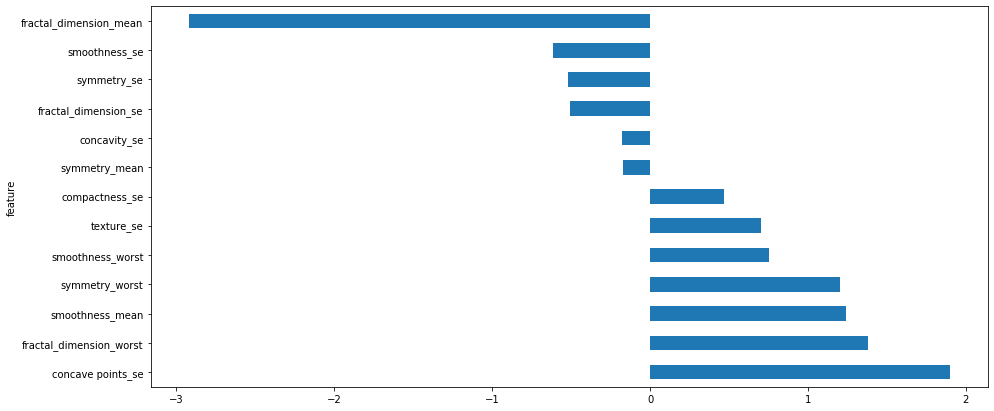

In [32]:
featureImportance = pd.DataFrame({"feature":df.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('barh', figsize=(15, 7));

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve

def plot_roc_curve(prob_prediction, actual):
    fpr, tpr, thresholds = roc_curve(y_test, prob_prediction)
    auc_score = roc_auc_score(y_test, prob_prediction)
    
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % auc_score)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title('ROC AUC')
    plt.show()

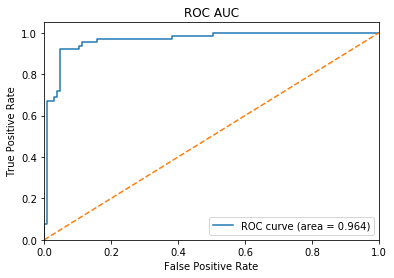

In [34]:
plot_roc_curve(log_reg.predict_proba(X_test_scaled)[:,1], y_test)

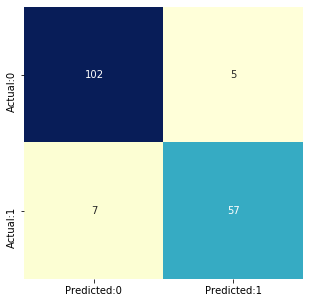

In [40]:
from sklearn.metrics import confusion_matrix


cm = confusion_matrix(y_test, log_reg.predict_proba(X_test_scaled)[:, 1]>0.5)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

**Логистическая регрессия с кросс-валидацией**

In [35]:
log_reg_cv = LogisticRegressionCV(Cs=100)
log_reg_cv.fit(X_train_scaled, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [36]:
df_quality.loc["Logistic Regression CV Train", :] = print_quality_report(log_reg_cv.predict(X_train_scaled), y_train)
df_quality.loc["Logistic Regression CV Test", :] = print_quality_report(log_reg_cv.predict(X_test_scaled), y_test)

df_quality.round(3)

,Accuracy,Precision,Recall,F1 score
Logistic Regression Train,0.907,0.872,0.878,0.875
Logistic Regression Test,0.930,0.891,0.919,0.905
Logistic Regression CV Train,0.907,0.865,0.883,0.874
Logistic Regression CV Test,0.924,0.875,0.918,0.896


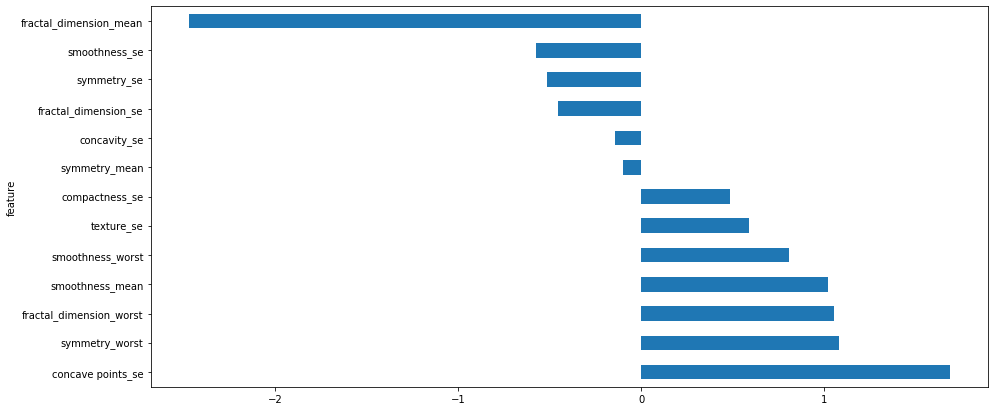

In [37]:
featureImportance = pd.DataFrame({"feature":df.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg_cv.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('barh', figsize=(15, 7));

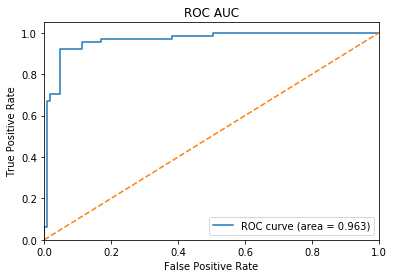

In [38]:
plot_roc_curve(log_reg_cv.predict_proba(X_test_scaled)[:,1], y_test)

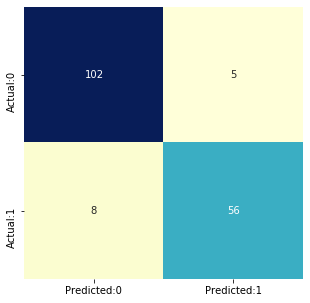

In [39]:
cm = confusion_matrix(y_test, log_reg_cv.predict_proba(X_test_scaled)[:, 1]>0.5)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

Обе модели показали схожие результаты. Сравним их с KNN

**KNN**

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

In [43]:
param_grid = {
    'n_neighbors': range(1, 50),
    'p': range(1, 4)
}

knn = KNeighborsClassifier()

rand_search = RandomizedSearchCV(knn, param_grid, cv=5, scoring='f1', random_state=40)
rand_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    rand_search.best_score_, rand_search.best_estimator_.n_neighbors)
) 

Best CV score: 0.797, best CV k: 22


In [42]:
test_predictions = rand_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Best CV score: 0.797, best CV k: 22
Resulting test score: 0.776


In [44]:
df_quality.loc["KNN Train", :] = print_quality_report(rand_search.predict(X_train_scaled), y_train)
df_quality.loc["KNN Test", :] = print_quality_report(rand_search.predict(X_test_scaled), y_test)

df_quality.round(3)

,Accuracy,Precision,Recall,F1 score
Logistic Regression Train,0.907,0.872,0.878,0.875
Logistic Regression Test,0.930,0.891,0.919,0.905
Logistic Regression CV Train,0.907,0.865,0.883,0.874
Logistic Regression CV Test,0.924,0.875,0.918,0.896
KNN Train,0.874,0.777,0.871,0.821
KNN Test,0.848,0.703,0.865,0.776


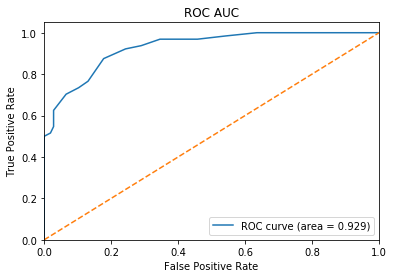

In [45]:
plot_roc_curve(rand_search.predict_proba(X_test_scaled)[:,1], y_test)

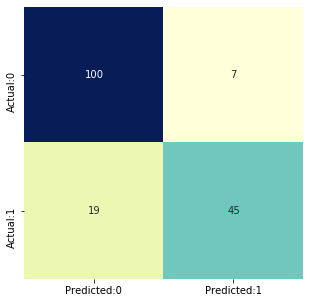

In [46]:
cm = confusion_matrix(y_test, rand_search.predict_proba(X_test_scaled)[:, 1]>0.5)

conf_matrix = pd.DataFrame(data = cm, columns = ['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
plt.figure(figsize = (5,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

У обеих логистических регрессий качество предсказания получилось заметно лучше чем у KNN.